# Library&Data Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [3]:
np.power(1.03, 2)

1.0609

In [4]:
data_raw = pd.read_csv("covid19_korea.csv", encoding="cp949")

In [5]:
data_raw.head()

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,2020-01-20,1,0,1,0.0
1,2020-01-21,0,0,0,0.0
2,2020-01-22,0,0,0,0.0
3,2020-01-23,0,0,0,0.0
4,2020-01-24,1,0,1,0.0


# Linear_Regression

In [24]:
data_linear_0120_0520 = data_raw.loc[(data_raw['일자'] >= "2021-01-20")&(data_raw['일자'] <= '2021-05-20')].copy()

In [25]:
data_linear_0120_0520['idx'] = data_linear_0120_0520.index - 365

In [26]:
data_linear_0120_0520 = data_linear_0120_0520.rename(columns={"계(명)":"confirmed cases"})

In [27]:
data_linear_0120_0520.head()

,일자,confirmed cases,국내발생(명),해외유입(명),사망(명),idx
366,2021-01-20,404,373,31,17.0,1
367,2021-01-21,400,381,19,16.0,2
368,2021-01-22,346,314,32,12.0,3
369,2021-01-23,431,403,28,9.0,4
370,2021-01-24,392,369,23,12.0,5


In [28]:
def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.02, .9, f'slope={slope:.2f}, intercept={intercept:.2f}, r2={rvalue ** 2 : .2f}', transform=ax.transAxes)

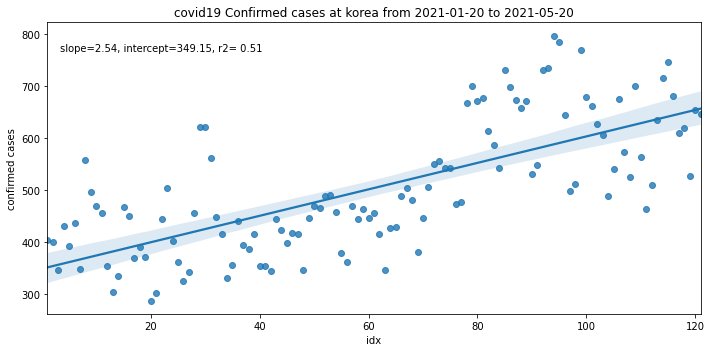

In [29]:
plt.figure(figsize=(10, 5))

ax = sns.regplot(x='idx', y='confirmed cases', data=data_linear_0120_0520)
annotate(ax, data=data_linear_0120_0520, x='idx', y='confirmed cases')
plt.title("covid19 Confirmed cases at korea from 2021-01-20 to 2021-05-20")
plt.tight_layout()
plt.show()

In [30]:
2.54*250 + 349.15

984.15

# Curve_fitting

In [31]:
def func(x, a, b):
    return np.power(a, x) + b

In [32]:
x = np.array(data_linear_0120_0520.idx)
y = np.array(data_linear_0120_0520['confirmed cases'])

In [33]:
params, _ = scipy.optimize.curve_fit(func, x, y)

In [34]:
params

array([  1.04772287, 453.29743834])

In [40]:
a, b = params[0], params[1]

In [75]:
yfit = np.power(a, 180) + b

In [76]:
yfit

4862.462555200685

In [129]:
data_linear_After0120 = data_raw.loc[(data_raw['일자'] >= "2021-01-20")&(data_raw['일자'] <= "2021-12-16")].copy()
data_linear_After0120['idx'] = data_linear_After0120.index - 365
data_linear_After0120 = data_linear_After0120.rename(columns={"계(명)":"confirmed_cases"})

In [137]:
data_linear_After0120['curve_fit_value'] = data_linear_After0120.idx.map(lambda x : np.power(1.027, x) + b)
data_linear_After0120['linear_fit_value'] = data_linear_After0120.idx.map(lambda x : x * 2.54 + 349.15)

In [142]:
data_linear_After0120.tail()

,일자,confirmed_cases,국내발생(명),해외유입(명),사망(명),idx,curve_fit_value,linear_fit_value
692,2021-12-12,6683,6655,28,42.0,327,6528.140409,1179.73
693,2021-12-13,5816,5781,35,40.0,328,6692.161170,1182.27
694,2021-12-14,5566,5524,42,94.0,329,6860.610490,1184.81
695,2021-12-15,7848,7825,23,70.0,330,7033.607943,1187.35
696,2021-12-16,7619,7588,31,62.0,331,7211.276326,1189.89


In [144]:
np.power(1.027, 360) + b

15087.184365773146

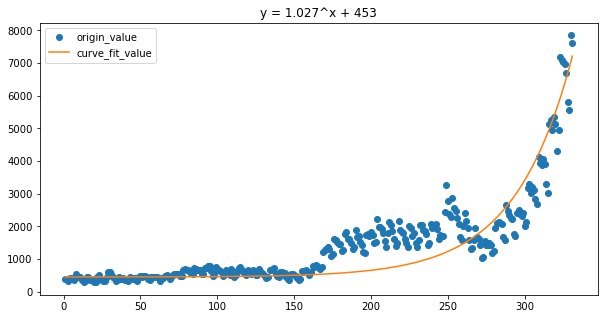

In [141]:
plt.figure(figsize = (10, 5))
plt.plot(data_linear_After0120['idx'], data_linear_After0120['confirmed_cases']
         , 'o', label='origin_value')
# plt.plot(data_linear_After0120['idx'], data_linear_After0120['linear_fit_value']
#          , label='linear_fit_value')
plt.plot(data_linear_After0120['idx'], data_linear_After0120['curve_fit_value']
         , label='curve_fit_value')
plt.title("y = 1.027^x + 453")
plt.legend(loc='best')

In [133]:
scipy.optimize.curve_fit

<function scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>